In [1]:
import pandas as pd
import sqlite3

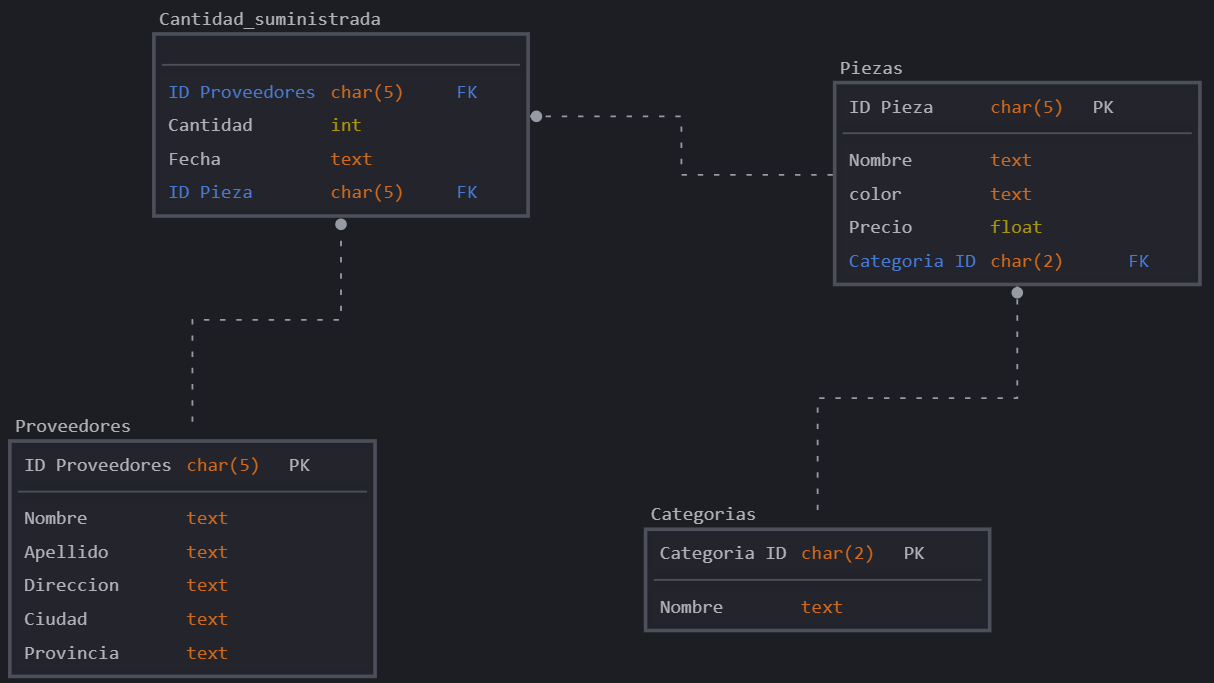

In [2]:
connection = sqlite3.connect('./Base_de_datos.db')

In [3]:
cursor_gestion = connection.cursor()

In [4]:
def query_sql(query):
    return pd.read_sql(query, connection)

In [5]:
query_create_proveedores = '''
CREATE TABLE Proveedores (
ID_PROVEEDORES   CHAR(5) PRIMARY KEY,
NOMBRE           TEXT NOT NULL,
APELLIDO         TEXT NOT NULL,
DIRECCION        TEXT NOT NULL,
CIUDAD           TEXT NOT NULL,
PROVINCIA        TEXT NOT NULL
)
'''
cursor_gestion.execute(query_create_proveedores)

In [6]:
query_create_cantidad_suministrada = '''
CREATE TABLE Cantidad_suministrada (
ID_PROVEEDORES   CHAR(5),
CANTIDAD         INT NOT NULL,
FECHA            TEXT NOT NULL,
ID_PIEZA         CHAR(5),
FOREIGN KEY(ID_PROVEEDORES) REFERENCES Proveedores(ID_PROVEEDORES)
)
'''
cursor_gestion.execute(query_create_cantidad_suministrada)

In [7]:
query_create_piezas = '''
CREATE TABLE Piezas (
ID_PIEZA        CHAR(5) PRIMARY KEY,
NOMBRE          TEXT NOT NULL,
COLOR           TEXT NOT NULL,
PRECIO          FLOAT NOT NULL,
CATEGORIA_ID    CHAR(2),
FOREIGN KEY(ID_PIEZA) REFERENCES Cantidad_suministrada(ID_PIEZA)
)
'''

cursor_gestion.execute(query_create_piezas)

In [8]:
query_create_categorias = '''
CREATE TABLE Categorias (
CATEGORIA_ID     CHAR(2) PRIMARY KEY,
NOMBRE           TEXT NOT NULL,
FOREIGN KEY(CATEGORIA_ID) REFERENCES Piezas(CATEGORIA_ID)
)
'''
cursor_gestion.execute(query_create_categorias)

In [9]:
#Datos de la tabla Proveedores

proveedores = {
    'MASA3': ('Manuel', 'Sánchez', 'Calle Cantabria, 9', 'Badalona', 'Barcelona'),
    'PEPI1': ('Pedro', 'Picapierdas', 'Calle Roger de Flor, 124', 'Barcelona', 'Barcelona'),
    'VIGA2': ('Víctor', 'García', 'Avenida Catalina, 56', 'Albarracín','Teruel'),
    'RUDI4': ('Rubén', 'Díaz', 'Calle de los vientos, 97', 'Guadalupe', 'Cáceres'),
    'CACA5': ('Carla', 'Castellano', 'Camino Sant Jerónimo del río, 845', 'Frías', 'Burgos'),
    'LAHE6': ('Laura', 'Hernández', 'Avenida de la comarca, 13', 'Vivero', 'Lugo')
}


for identificador, datos in proveedores.items():
    nombre = datos[0]
    apellido = datos[1]
    direccion = datos[2]
    ciudad = datos[3]
    provincia = datos[4]
    query = f'''
    INSERT INTO Proveedores (ID_PROVEEDORES, NOMBRE, APELLIDO, DIRECCION, CIUDAD, PROVINCIA)
    VALUES ('{identificador}', '{nombre}', '{apellido}', '{direccion}', '{ciudad}', '{provincia}')
    '''
    cursor_gestion.execute(query)
    

In [10]:
#Datos de la tabla de Cantidad_suministrada

datos_suministros = [
    ("MASA3", 3, "01022023", "0004D"),
    ("MASA3", 5, "02042025", "0009I"),
    ("MASA3", 10, "08122021", "0010J"),
    ("PEPI1", 7, "09112024", "0006F"),
    ("PEPI1", 8, "27102023", "0008H"),
    ("PEPI1", 9, "11052024", "0007G"),
    ("PEPI1", 3, "16022025", "0009I"),
    ("PEPI1", 6, "18042024", "0004D"),
    ("VIGA2", 10, "20092024", "0001A"),
    ("VIGA2", 20, "14062023", "0002B"),
    ("VIGA2", 15, "15072024", "0003B"),
    ("VIGA2", 10, "13052023", "0010J"),
    ("VIGA2", 10, "13052023", "0005E"),
    ("RUDI4", 5, "11042025", "0006F"),
    ("RUDI4", 10, "19062024", "0007G"),
    ("RUDI4", 10, "11022025", "0008H"),
    ("CACA5", 5, "08012025", "0001A"),
    ("CACA5", 5, "08012025", "0002B"),
    ("CACA5", 5, "17022025", "0003C"),
    ("CACA5", 5, "10042025", "0005E"),
    ("LAHE6", 7, "12122024", "0004D"),
    ("LAHE6", 7, "14122024", "0009I"),
    ("LAHE6", 8, "20012025", "0010J")
]

for valores in datos_suministros:
    id_proveedores = valores[0]
    cantidad = valores[1]
    Fecha = valores[2]
    ID_Pieza = valores[3]
    query= f'''
    INSERT INTO Cantidad_suministrada (ID_PROVEEDORES, CANTIDAD, FECHA, ID_PIEZA) 
    VALUES ('{id_proveedores}',{cantidad}, '{Fecha}', '{ID_Pieza}')'''
    
    cursor_gestion.execute(query)

In [11]:
#Datos de la tabla Piezas

piezas = {
    "0001A": ("Rueda", "Negro", 50, "RE"),
    "0002B": ("Sillín", "Negro", 35, "RE"),
    "0003C": ("Manillar", "Metálico", 80, "RE"),
    "0004D": ("Casco", "Blanco", 40, "SE"),
    "0005E": ("Suspensión", "Metálico", 25, "RE"),
    "0006F": ("Maillot", "Amarillo", 55, "VE"),
    "0007G": ("Guantes", "Azul", 20, "VE"),
    "0008H": ("Zapatillas", "Rojo", 60, "VE"),
    "0009I": ("Gafas", "Negro", 45, "VE"),
    "0010J": ("Luces", "Rojo", 15, "SE")
}

for nombre, valores in piezas.items():
    ID_Pieza = valores[0]
    Color = valores[1]
    Precio = valores[2]
    Categoria = valores [3]
    query= f'''
    INSERT INTO Piezas (ID_PIEZA, NOMBRE, COLOR, PRECIO, CATEGORIA_ID) 
    VALUES ('{nombre}', '{ID_Pieza}', '{Color}', {Precio}, '{Categoria}')
    '''
    
    cursor_gestion.execute(query)

In [12]:
#Datos de la tabla Categorías

categorias = {
    'RE' : ('Recambio'),
    'VE' : ('Vestuario'),
    'SE' : ('Seguridad')
}

for cat, nom in categorias.items():
    query = f'''
    INSERT INTO Categorias (CATEGORIA_ID, NOMBRE)
    VALUES ('{cat}', '{nom}')
    '''

    cursor_gestion.execute(query)

In [14]:
query = '''
SELECT *
FROM proveedores
'''
query_sql(query)

,ID_PROVEEDORES,NOMBRE,APELLIDO,DIRECCION,CIUDAD,PROVINCIA
0,MASA3,Manuel,Sánchez,"Calle Cantabria, 9",Badalona,Barcelona
1,PEPI1,Pedro,Picapierdas,"Calle Roger de Flor, 124",Barcelona,Barcelona
2,VIGA2,Víctor,García,"Avenida Catalina, 56",Albarracín,Teruel
3,RUDI4,Rubén,Díaz,"Calle de los vientos, 97",Guadalupe,Cáceres
4,CACA5,Carla,Castellano,"Camino Sant Jerónimo del río, 845",Frías,Burgos
5,LAHE6,Laura,Hernández,"Avenida de la comarca, 13",Vivero,Lugo


In [15]:
query = '''
SELECT *
FROM Cantidad_suministrada
'''
query_sql(query)

,ID_PROVEEDORES,CANTIDAD,FECHA,ID_PIEZA
0,MASA3,3,01022023,0004D
1,MASA3,5,02042025,0009I
2,MASA3,10,08122021,0010J
3,PEPI1,7,09112024,0006F
4,PEPI1,8,27102023,0008H
5,PEPI1,9,11052024,0007G
6,PEPI1,3,16022025,0009I
7,PEPI1,6,18042024,0004D
8,VIGA2,10,20092024,0001A
9,VIGA2,20,14062023,0002B


In [16]:
query = '''
SELECT *
FROM Piezas
'''
query_sql(query)

,ID_PIEZA,NOMBRE,COLOR,PRECIO,CATEGORIA_ID
0,0001A,Rueda,Negro,50.0,RE
1,0002B,Sillín,Negro,35.0,RE
2,0003C,Manillar,Metálico,80.0,RE
3,0004D,Casco,Blanco,40.0,SE
4,0005E,Suspensión,Metálico,25.0,RE
5,0006F,Maillot,Amarillo,55.0,VE
6,0007G,Guantes,Azul,20.0,VE
7,0008H,Zapatillas,Rojo,60.0,VE
8,0009I,Gafas,Negro,45.0,VE
9,0010J,Luces,Rojo,15.0,SE


In [17]:
query = '''
SELECT *
FROM Categorias
'''
query_sql(query)

,CATEGORIA_ID,NOMBRE
0,RE,Recambio
1,VE,Vestuario
2,SE,Seguridad


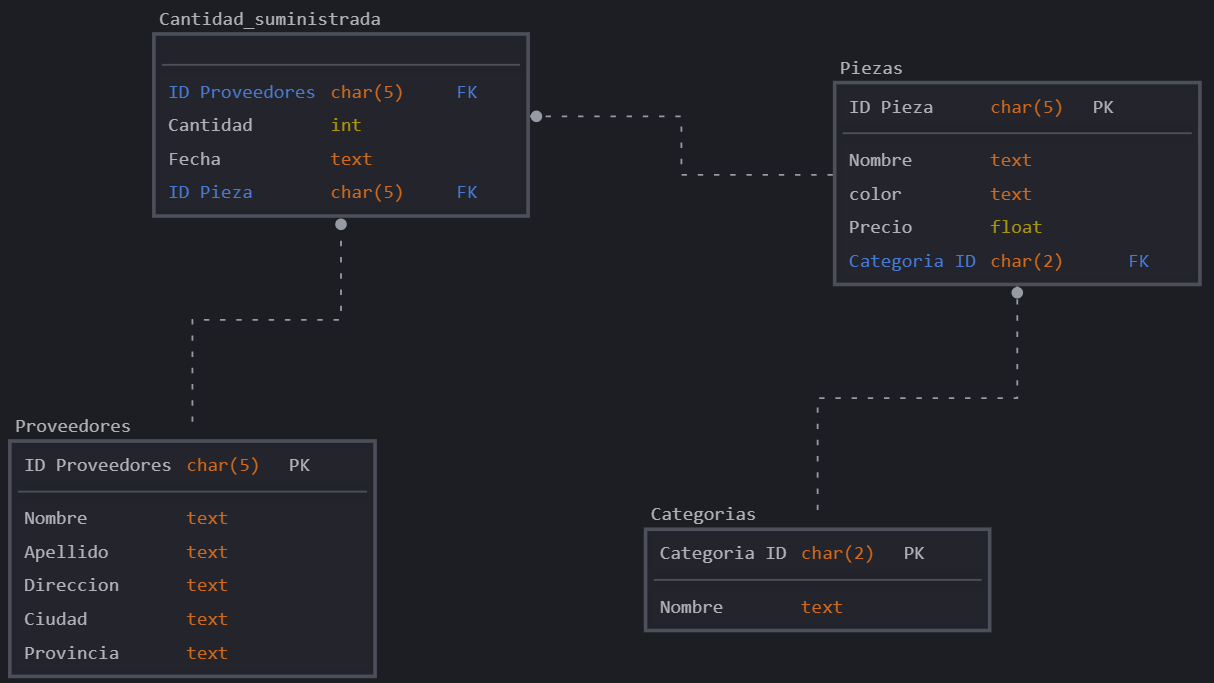

In [18]:
query = '''
SELECT a.*, b.*
FROM categorias AS a
INNER JOIN piezas AS b
ON a.CATEGORIA_ID = b.CATEGORIA_ID
'''

query_sql(query)

,CATEGORIA_ID,NOMBRE,ID_PIEZA,NOMBRE,COLOR,PRECIO,CATEGORIA_ID
0,RE,Recambio,0001A,Rueda,Negro,50.0,RE
1,RE,Recambio,0002B,Sillín,Negro,35.0,RE
2,RE,Recambio,0003C,Manillar,Metálico,80.0,RE
3,SE,Seguridad,0004D,Casco,Blanco,40.0,SE
4,RE,Recambio,0005E,Suspensión,Metálico,25.0,RE
5,VE,Vestuario,0006F,Maillot,Amarillo,55.0,VE
6,VE,Vestuario,0007G,Guantes,Azul,20.0,VE
7,VE,Vestuario,0008H,Zapatillas,Rojo,60.0,VE
8,VE,Vestuario,0009I,Gafas,Negro,45.0,VE
9,SE,Seguridad,0010J,Luces,Rojo,15.0,SE


In [19]:
query = '''
SELECT a.*,z.*, b.*
FROM proveedores AS a
INNER JOIN cantidad_suministrada AS z ON a.ID_PROVEEDORES = z.ID_PROVEEDORES
INNER JOIN piezas AS b ON b.ID_PIEZA = z.ID_PIEZA
WHERE a.nombre LIKE '%Manuel%' or a.ciudad LIKE '%Albarracín%'
'''
query_sql(query)


,ID_PROVEEDORES,NOMBRE,APELLIDO,DIRECCION,CIUDAD,PROVINCIA,ID_PROVEEDORES,CANTIDAD,FECHA,ID_PIEZA,ID_PIEZA,NOMBRE,COLOR,PRECIO,CATEGORIA_ID
0,MASA3,Manuel,Sánchez,"Calle Cantabria, 9",Badalona,Barcelona,MASA3,3,01022023,0004D,0004D,Casco,Blanco,40.0,SE
1,MASA3,Manuel,Sánchez,"Calle Cantabria, 9",Badalona,Barcelona,MASA3,5,02042025,0009I,0009I,Gafas,Negro,45.0,VE
2,MASA3,Manuel,Sánchez,"Calle Cantabria, 9",Badalona,Barcelona,MASA3,10,08122021,0010J,0010J,Luces,Rojo,15.0,SE
3,VIGA2,Víctor,García,"Avenida Catalina, 56",Albarracín,Teruel,VIGA2,10,20092024,0001A,0001A,Rueda,Negro,50.0,RE
4,VIGA2,Víctor,García,"Avenida Catalina, 56",Albarracín,Teruel,VIGA2,20,14062023,0002B,0002B,Sillín,Negro,35.0,RE
5,VIGA2,Víctor,García,"Avenida Catalina, 56",Albarracín,Teruel,VIGA2,10,13052023,0010J,0010J,Luces,Rojo,15.0,SE
6,VIGA2,Víctor,García,"Avenida Catalina, 56",Albarracín,Teruel,VIGA2,10,13052023,0005E,0005E,Suspensión,Metálico,25.0,RE


In [20]:
query = '''
SELECT nombre || ' ' || apellido as Nombre_completo, direccion
FROM Proveedores
'''
query_sql(query)

,Nombre_completo,DIRECCION
0,Manuel Sánchez,"Calle Cantabria, 9"
1,Pedro Picapierdas,"Calle Roger de Flor, 124"
2,Víctor García,"Avenida Catalina, 56"
3,Rubén Díaz,"Calle de los vientos, 97"
4,Carla Castellano,"Camino Sant Jerónimo del río, 845"
5,Laura Hernández,"Avenida de la comarca, 13"


In [21]:
query = '''
SELECT DISTINCT id_pieza
FROM cantidad_suministrada
'''
query_sql(query)

,ID_PIEZA
0,0004D
1,0009I
2,0010J
3,0006F
4,0008H
5,0007G
6,0001A
7,0002B
8,0003B
9,0005E


In [13]:
connection.commit()

In [23]:
cursor_gestion.close()

In [24]:
connection.close()

In [22]:
query = '''
SELECT *
FROM sqlite_master
WHERE type = 'table'
'''

cursor_gestion.execute(query)
cursor_gestion.fetchall()

[('table',
  'Proveedores',
  'Proveedores',
  2,
  'CREATE TABLE Proveedores (\nID_PROVEEDORES   CHAR(5) PRIMARY KEY,\nNOMBRE           TEXT NOT NULL,\nAPELLIDO         TEXT NOT NULL,\nDIRECCION        TEXT NOT NULL,\nCIUDAD           TEXT NOT NULL,\nPROVINCIA        TEXT NOT NULL\n)'),
 ('table',
  'Cantidad_suministrada',
  'Cantidad_suministrada',
  4,
  'CREATE TABLE Cantidad_suministrada (\nID_PROVEEDORES   CHAR(5),\nCANTIDAD         INT NOT NULL,\nFECHA            TEXT NOT NULL,\nID_PIEZA         CHAR(5),\nFOREIGN KEY(ID_PROVEEDORES) REFERENCES Proveedores(ID_PROVEEDORES)\n)'),
 ('table',
  'Piezas',
  'Piezas',
  5,
  'CREATE TABLE Piezas (\nID_PIEZA        CHAR(5) PRIMARY KEY,\nNOMBRE          TEXT NOT NULL,\nCOLOR           TEXT NOT NULL,\nPRECIO          FLOAT NOT NULL,\nCATEGORIA_ID    CHAR(2),\nFOREIGN KEY(ID_PIEZA) REFERENCES Cantidad_suministrada(ID_PIEZA)\n)'),
 ('table',
  'Categorias',
  'Categorias',
  7,
  'CREATE TABLE Categorias (\nCATEGORIA_ID     CHAR(2) PRIMARY